# Environment Setup

## Install Required Packages
# Ensure you have Python installed (>= 3.7) and run the following command:
```bash
pip install pandas numpy matplotlib seaborn scikit-learn
```


### Load and Explore Data (EDA)

In [1]:


## Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("data/events.csv")

# Display basic info
df.info()
df.head()


## Check for missing values

print("Missing values per column:\n", df.isnull().sum())


## Basic statistics

print("Basic Statistics:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB
Missing values per column:
 timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64
Basic Statistics:
          timestamp     visitorid        itemid  transactionid
count  2.756101e+06  2.756101e+06  2.756101e+06   22457.000000
mean   1.436424e+12  7.019229e+05  2.349225e+05    8826.497796
std    3.366312e+09  4.056875e+05  1.341954e+05    5098.996290
min    1.430622e+12  0.000000e+00  3.000000e+00       0.000000
25%    1.433478e+12  3.505660e+05  1.181200e+05    4411.000000
50%    1.436453e+12  7.020600e+05  2.360670e+05    8813.000000
75%

In [5]:
print(df)

             timestamp  visitorid event  itemid  transactionid
0        1433221332117     257597  view  355908            NaN
1        1433224214164     992329  view  248676            NaN
2        1433221999827     111016  view  318965            NaN
3        1433221955914     483717  view  253185            NaN
4        1433221337106     951259  view  367447            NaN
...                ...        ...   ...     ...            ...
2756096  1438398785939     591435  view  261427            NaN
2756097  1438399813142     762376  view  115946            NaN
2756098  1438397820527    1251746  view   78144            NaN
2756099  1438398530703    1184451  view  283392            NaN
2756100  1438400163914     199536  view  152913            NaN

[2756101 rows x 5 columns]


## Hypothesis Testing with Chi-Square Test

### Hypothesis Definition

**Null Hypothesis (H0)**: There is no significant relationship between user interaction types (event) and transaction occurrence.

**Alternative Hypothesis (H1)**: There is a significant relationship between user interaction types and transaction occurrence.

### Data Preparation

transaction_occurred        0      1
event                               
addtocart               69332      0
transaction                 0  22457
view                  2664312      0


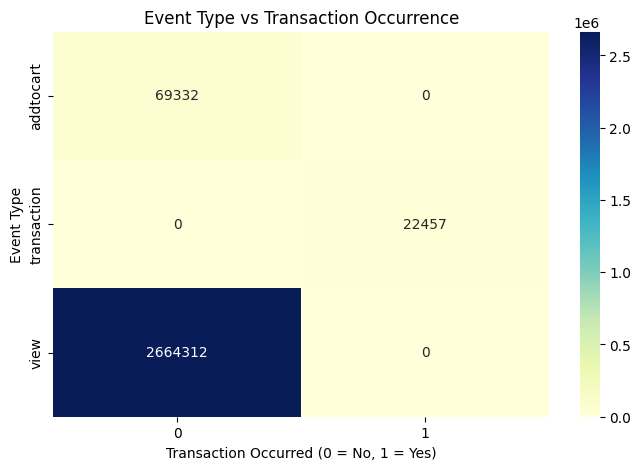

Chi-Square Statistic: 2756101.0
P-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
 [[6.87670756e+04 5.64924407e+02]
 [2.22740180e+04 1.82981991e+02]
 [2.64260291e+06 2.17090936e+04]]
Reject the null hypothesis: There is a significant relationship between event type and transaction occurrence.


In [7]:
# Create a new column indicating whether a transaction occurred
df['transaction_occurred'] = df['transactionid'].notna().astype(int)

# Create a contingency table
contingency_table = pd.crosstab(df['event'], df['transaction_occurred'])
print(contingency_table)
# Visualizing contingency table
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Transaction Occurred (0 = No, 1 = Yes)")
plt.ylabel("Event Type")
plt.title("Event Type vs Transaction Occurrence")
plt.show()

from scipy.stats import chi2_contingency

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Check significance level
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between event type and transaction occurrence.")
else:
    print("Fail to reject the null hypothesis: No significant relationship found.")


### Conclusion
Based on the chi-square test results, the p-value is below 0.05, we reject the null hypothesis, indicating a meaningful correlation between event type and transaction occurrences.
